In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# File to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# Get the columns and the rows that are not null.
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df['type']=="Urban")

66

In [9]:
# Get the number of data points from the Rural cities.
sum(city_data_df['type']=="Rural")

18

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df['type']=="Suburban")

36

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
## Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban and Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
# Get the number of rides for urban cities.
urban_city_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_city_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Get the number of rides for Rural cities.
rural_city_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_city_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for urban cities.
suburban_city_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_city_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the Rural cities.r
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the Suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head() 


city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [25]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head() 

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head() 

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

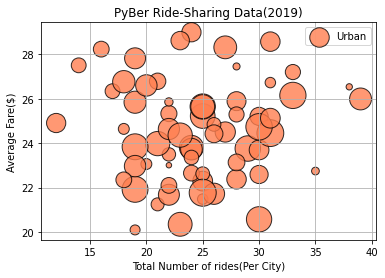

In [37]:
# Build the scatter plots for urban cities.
plt.scatter(urban_city_count,
            urban_avg_fare, s=10*urban_driver_count,edgecolor ='k',linewidth=1,c="coral", alpha=0.8,label="Urban" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

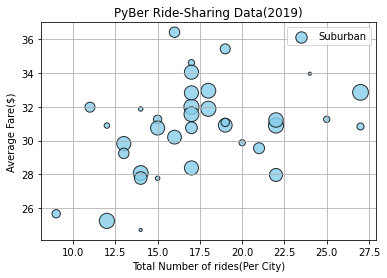

In [39]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_city_count,
            suburban_avg_fare, s=10*suburban_driver_count,edgecolor ='k',linewidth=1,c="skyblue", alpha=0.8,label="Suburban" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

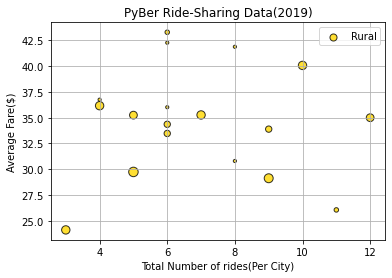

In [40]:
# Build the scatter plots for rural cities.
plt.scatter(rural_city_count,
            rural_avg_fare, s=10*rural_driver_count,edgecolor ='k',linewidth=1,c="gold", alpha=0.8,label="Rural" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

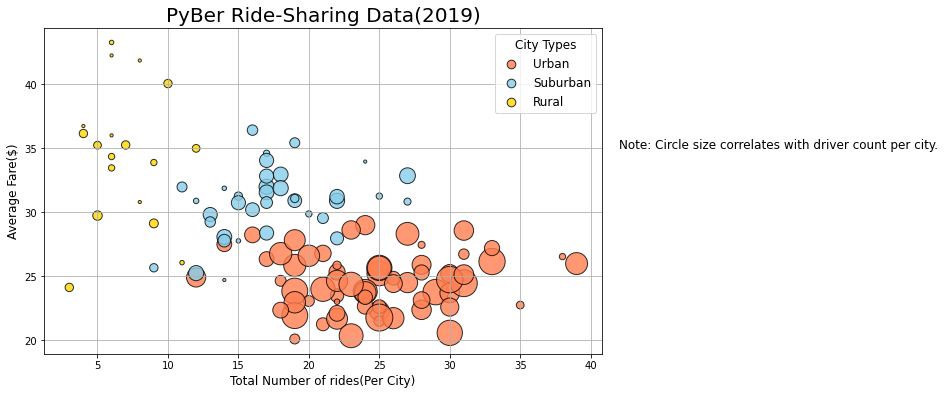

In [81]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urban_city_count,
            urban_avg_fare, s=10*urban_driver_count,edgecolor ='k',linewidth=1,c="coral", alpha=0.8,label="Urban" )

# Build the scatter plots for suburban cities.
plt.scatter(suburban_city_count,
            suburban_avg_fare, s=10*suburban_driver_count,edgecolor ='k',linewidth=1,c="skyblue", alpha=0.8,label="Suburban" )


# Build the scatter plots for rural cities.
plt.scatter(rural_city_count,
            rural_avg_fare, s=10*rural_driver_count,edgecolor ='k',linewidth=1,c="gold", alpha=0.8,label="Rural" )

# Incorporate the other graph properties
# add title
plt.title('PyBer Ride-Sharing Data(2019)',fontsize=20)
# Add labels
plt.xlabel('Total Number of rides(Per City)',fontsize=12)
plt.ylabel('Average Fare($)',fontsize=12)
# Add grid
plt.grid()
# Create a legend
# Urban suburban and rural fontsize 
lgnd = plt.legend(fontsize="12",
          mode="Expended",scatterpoints=1,loc=0, title="City Types")
# marker size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Title(City Types) fonsize
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()
